# __exploratory data analysis Algerian Forest Fire Dataset__

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
data = pd.read_csv(r"../Algerian_forest_fires_dataset_UPDATE.csv",header=1)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
data[data.isna().any(axis=1)]
data.iloc[121:125,:]
data.drop([122,123],inplace=True)
data.reset_index(inplace=True)
data.drop(['index',"day","month","year"],axis=1,inplace=True)
data["region"] = None
data.iloc[:122,-1] = "Bejaia"
data.iloc[122:,-1] = "Abbes"
data

# __Data cleaning operations__

In [ ]:
data.info()

Getting unique values from y data column:  
Getting unique values from a column involves identifying and selecting only the distinct or unique values in that column.

In [6]:
data["Classes  "].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

Apply `str.strip()` to clean the data:  
As we can see y data has some blank spaces so we need to remove then before use.  
I have used the `.strip()` method in Python to remove the leading and trailing spaces from the data in a column.

In [7]:
data["Classes  "] = data["Classes  "].str.strip()

In [ ]:
data["Classes  "].unique()

Convert data type of all data column:  
* In below code I am selecting all data which are intiger and making the column data type as float64

In [ ]:
columns = data.columns[:-2]
for i in columns:
    data[i] = data[i].astype("float64")
data.info()

# __EDA for data set__

Summarize dataset:  96%|█████████▌| 120/125 [00:17<00:00,  8.56it/s, Missing diagram matrix]         /home/sanjiv/anaconda3/lib/python3.9/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Matrix missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Matrix": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_co

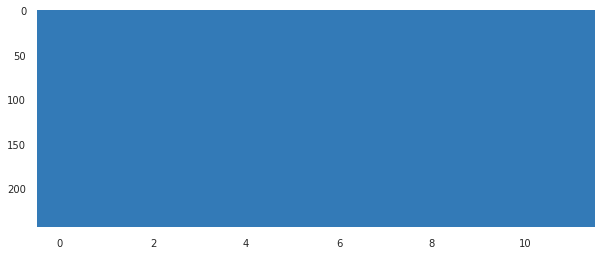

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, explorative=True)

#Saving results to a HTML file
profile.to_file("pandas_profiling.html")

In [11]:
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(data)

#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
data.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'region'],
      dtype='object')

In [12]:
data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


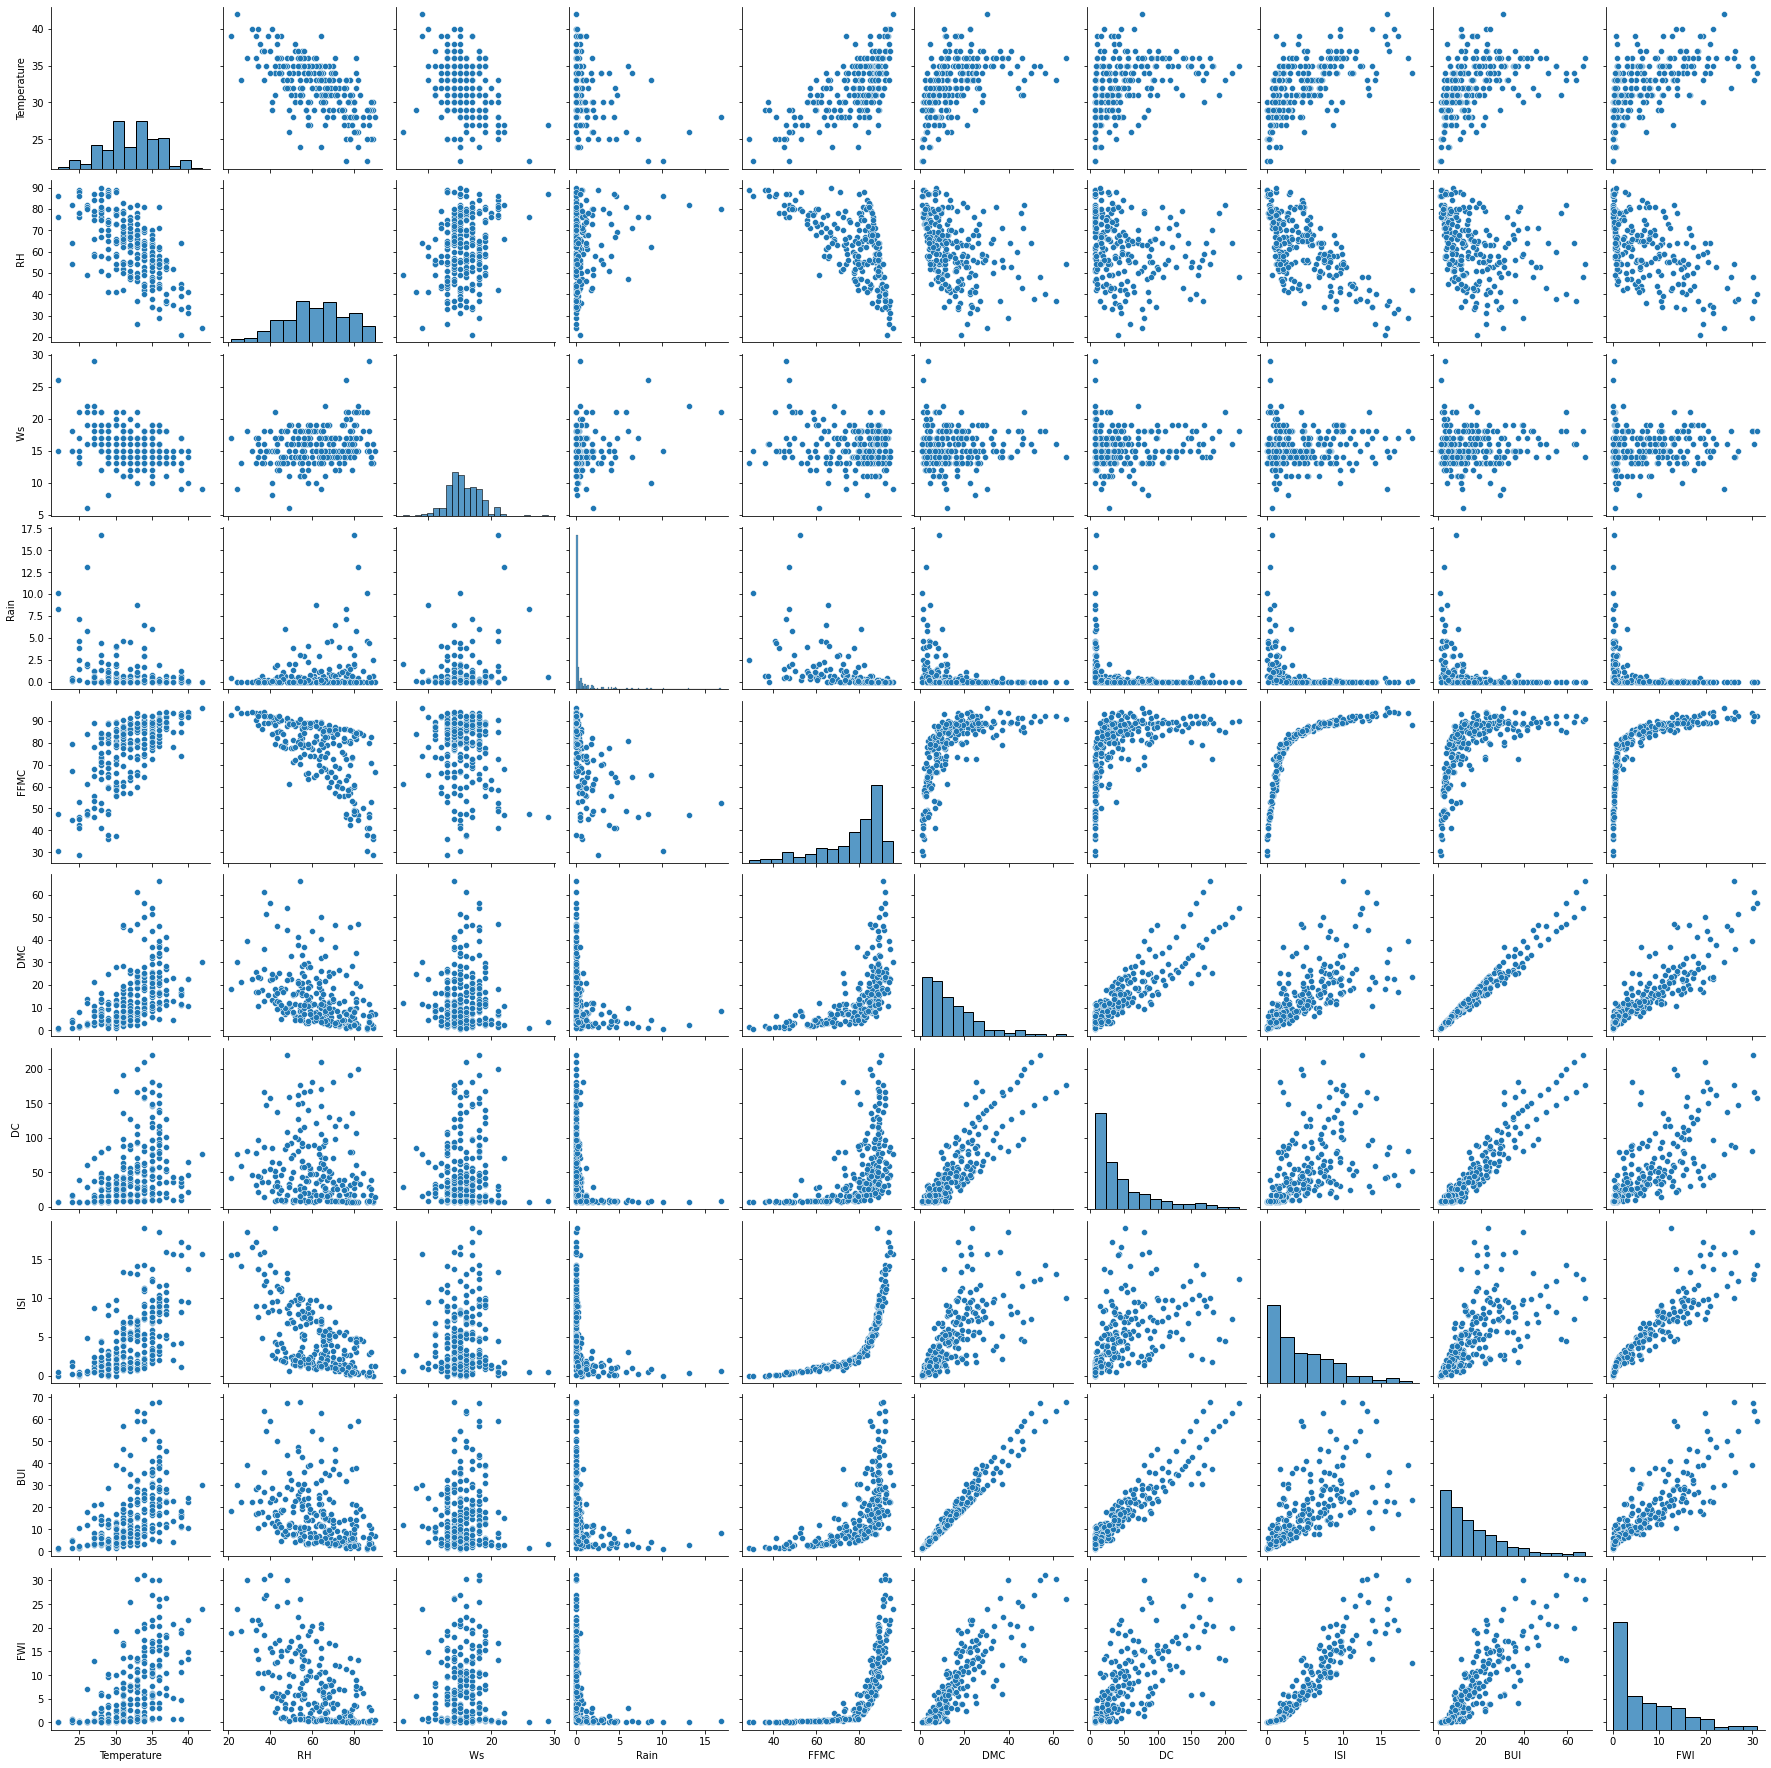

In [13]:
sns.pairplot(data)

From above `pairplot` we can see `Temperature`, `RH` and `Ws` are seems like normally distributed so we need to do `Normality tests` for same

## __univariate analysis__  
* Univariate analysis is a statistical analysis technique that focuses on analyzing a single variable at a time. It is a type of data analysis that involves examining the distribution, central tendency, and dispersion of a single variable without considering any other variable. Univariate analysis is useful in summarizing and understanding the characteristics of a single variable, such as its range, mean, median, mode, and standard deviation.  
  
  
* univariate analysis techniques include descriptive statistics such as frequency distribution, histograms, bar charts, and box plots. These techniques can help to identify outliers, missing values, and other patterns in the data.

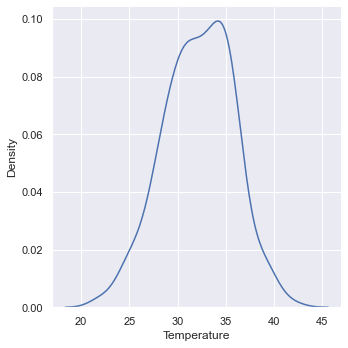

In [14]:
# analysis for Temperature
sns.set(rc={'figure.figsize':(8,6)})
sns.displot(data=data["Temperature"],kind="kde")

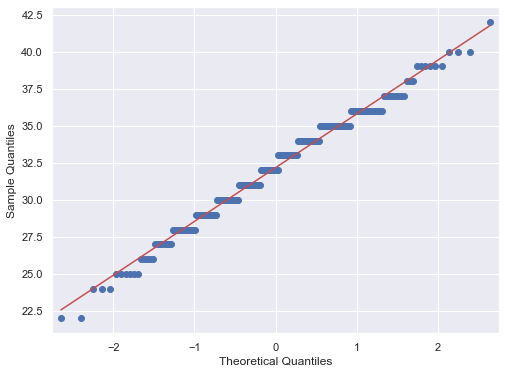

In [15]:
from numpy.random import seed
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(data["Temperature"], line='s')
pyplot.show()

* The `normaltest` is a statistical test used to determine whether a given sample of data follows a normal distribution or not. The test is based on the null hypothesis that the sample is normally distributed, and the alternative hypothesis that it is not.

In [16]:
from scipy.stats import normaltest
normaltest(data["Temperature"])

NormaltestResult(statistic=1.7805389205299786, pvalue=0.41054511225166823)

* We can see p-value for `Temperature` is `0.41054511225166823` which is greater then 0.05 to we can accept the null hypothesis  
  
* i.e `Temperature` is normally distributed

In [17]:
from scipy.stats import kurtosis
from scipy.stats import skew

print(skew(data["Temperature"],bias=True))
print(kurtosis(data["Temperature"],bias=True))

-0.1950999958767491
-0.17565616412106388


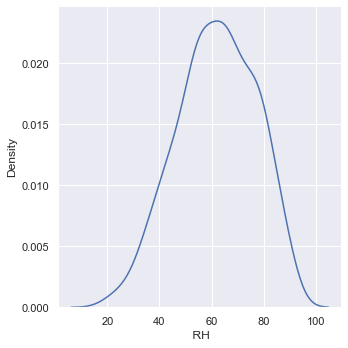

In [18]:
# analysis for Temperature
sns.set(rc={'figure.figsize':(8,6)})
sns.displot(data=data[" RH"],kind="kde")

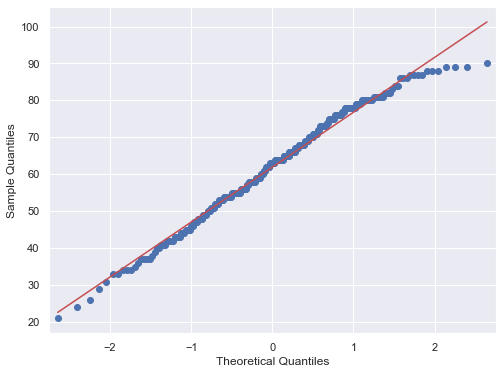

In [19]:
qqplot(data[" RH"], line='s')
pyplot.show()

In [20]:
from scipy.stats import normaltest
normaltest(data[" RH"])

NormaltestResult(statistic=7.260230503875478, pvalue=0.0265131285433602)

In [21]:
print(skew(data[" RH"],bias=True))
print(kurtosis(data[" RH"],bias=True))

-0.2364989921040004
-0.5440124652305531


* We can see p-value for `RH` is `0.0265131285433602` which is less then 0.05 to we can reject the null hypothesis  
  
* i.e `RH` is not normally distributed

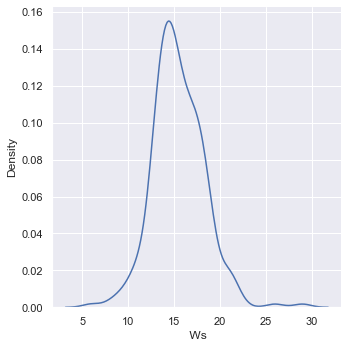

In [22]:
# analysis for Ws
sns.set(rc={'figure.figsize':(8,6)})
sns.displot(data=data[" Ws"],kind="kde")

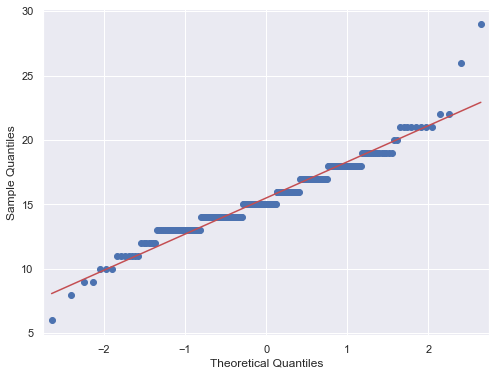

In [23]:
qqplot(data[" Ws"], line='s')
pyplot.show()

In [24]:
from scipy.stats import normaltest
normaltest(data[" Ws"])

NormaltestResult(statistic=30.110834461628137, pvalue=2.894112266037264e-07)

In [25]:
print(skew(data[" Ws"],bias=True))
print(kurtosis(data[" Ws"],bias=True))

0.5425196754701939
2.5246482239889394


* We can see p-value for `Ws` is `2.894112266037264e-07` which is less then 0.05 to we can reject the null hypothesis  
  
* i.e `Ws` is not normally distributed

## __Biveriot analysis__

In [26]:
data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [27]:
data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000


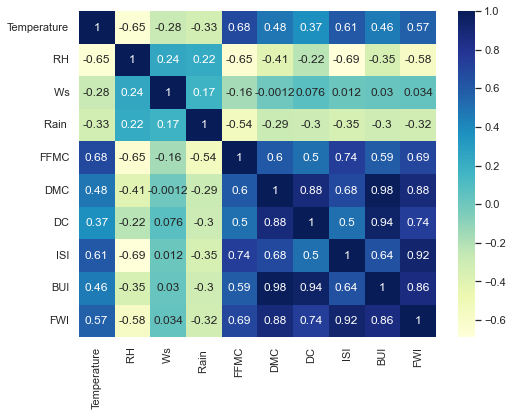

In [28]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()